In [3]:
pip install yfinance


Note: you may need to restart the kernel to use updated packages.


In [7]:
pip install prophet

  Using cached holidays-0.63-py3-none-any.whl.metadata (26 kB)
   ---------------------------------------- 0.0/13.3 MB ? eta -:--:--
   ----- ---------------------------------- 1.8/13.3 MB 12.6 MB/s eta 0:00:01
   ---------------------------------------  13.1/13.3 MB 43.2 MB/s eta 0:00:01
   ---------------------------------------- 13.3/13.3 MB 38.0 MB/s eta 0:00:00
Using cached holidays-0.63-py3-none-any.whl (1.2 MB)
Note: you may need to restart the kernel to use updated packages.


In [11]:
import pandas as pd
import matplotlib.pyplot as plt
from prophet import Prophet
import yfinance as yf

In [13]:
data = yf.download('AAPL', start='2015-01-01', end='2023-12-31')
data.reset_index(inplace=True)


[*********************100%***********************]  1 of 1 completed


In [99]:
prophet_data.columns = ['ds', 'y']

print(prophet_data.head())
print(prophet_data.info())


          ds          y
0 2015-01-02  27.332500
1 2015-01-05  26.562500
2 2015-01-06  26.565001
3 2015-01-07  26.937500
4 2015-01-08  27.972500
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2264 entries, 0 to 2263
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   ds      2264 non-null   datetime64[ns]
 1   y       2264 non-null   float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 35.5 KB
None


In [27]:
model = Prophet(daily_seasonality=False, yearly_seasonality=True)
model.fit(prophet_data)

07:53:16 - cmdstanpy - INFO - Chain [1] start processing
07:53:17 - cmdstanpy - INFO - Chain [1] done processing


In [29]:
future = model.make_future_dataframe(periods=30)  
forecast = model.predict(future)

<Figure size 1000x600 with 0 Axes>

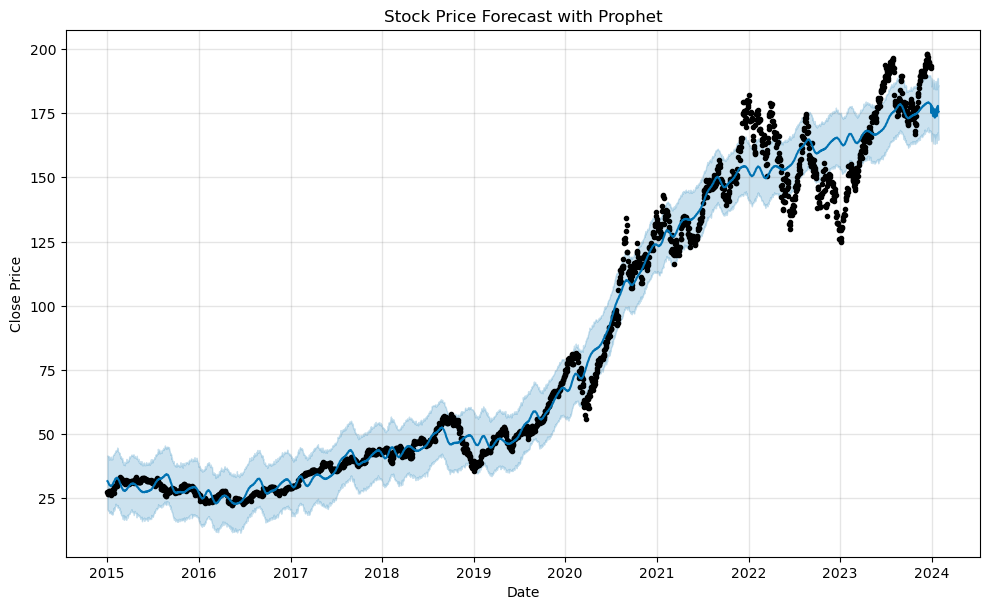

<Figure size 1000x600 with 0 Axes>

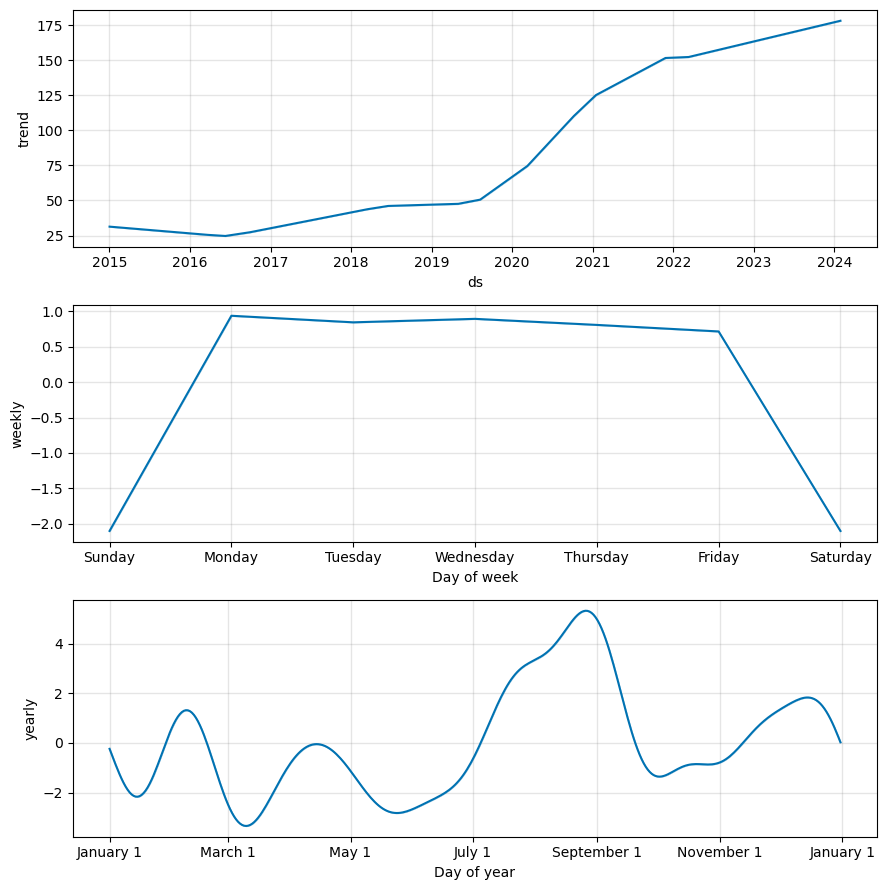

In [33]:
plt.figure(figsize=(10, 6))
model.plot(forecast)
plt.title("Stock Price Forecast with Prophet")
plt.xlabel("Date")
plt.ylabel("Close Price")
plt.show()

plt.figure(figsize=(10, 6))
model.plot_components(forecast)
plt.show()


In [35]:

forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail(10)


,ds,yhat,yhat_lower,yhat_upper
2284,2024-01-19,176.478251,165.537161,187.575812
2285,2024-01-20,173.802924,163.508291,184.246371
2286,2024-01-21,173.972053,163.374077,185.335624
2287,2024-01-22,177.205443,166.528310,187.609118
2288,2024-01-23,177.321984,165.835174,187.898062
2289,2024-01-24,177.596759,167.560655,188.523687
2290,2024-01-25,177.750038,167.457831,188.787752
2291,2024-01-26,177.906561,166.798986,188.624124
2292,2024-01-27,175.341064,164.616613,185.484482
2293,2024-01-28,175.599878,164.992125,185.958808


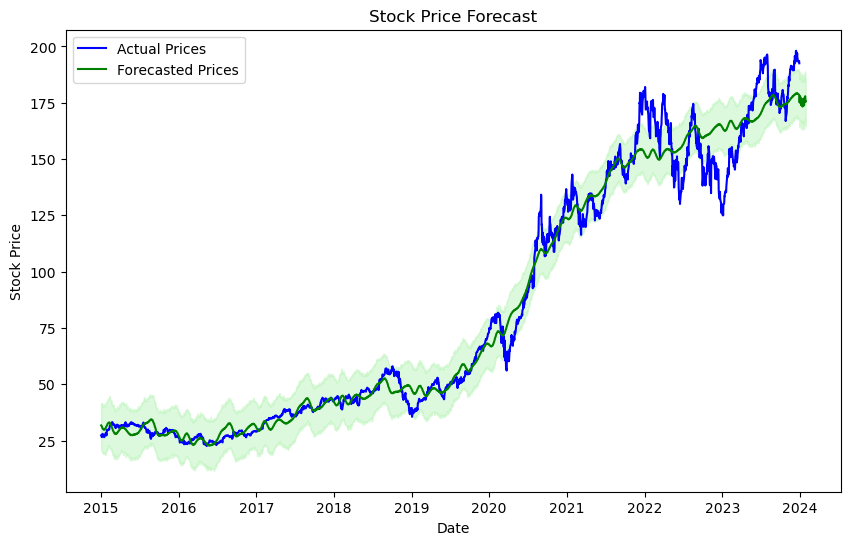

In [37]:
from matplotlib import pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(prophet_data['ds'], prophet_data['y'], label="Actual Prices", color='blue')
plt.plot(forecast['ds'], forecast['yhat'], label="Forecasted Prices", color='green')
plt.fill_between(forecast['ds'], forecast['yhat_lower'], forecast['yhat_upper'], color='lightgreen', alpha=0.3)
plt.title("Stock Price Forecast")
plt.xlabel("Date")
plt.ylabel("Stock Price")
plt.legend()
plt.show()


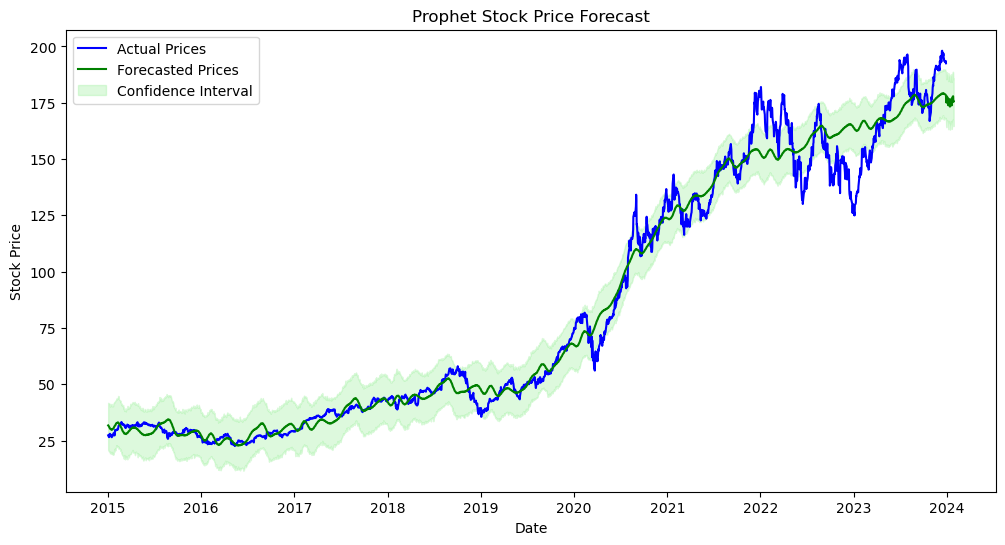

In [95]:
from matplotlib import pyplot as plt

plt.figure(figsize=(12, 6))
plt.plot(prophet_data['ds'], prophet_data['y'], label='Actual Prices', color='blue')

plt.plot(forecast['ds'], forecast['yhat'], label='Forecasted Prices', color='green')
plt.fill_between(forecast['ds'], forecast['yhat_lower'], forecast['yhat_upper'],
                 color='lightgreen', alpha=0.3, label='Confidence Interval')

plt.title("Prophet Stock Price Forecast")
plt.xlabel("Date")
plt.ylabel("Stock Price")
plt.legend()
plt.show()


In [97]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

results = prophet_data.merge(forecast[['ds', 'yhat']], on='ds', how='inner')

mae = mean_absolute_error(results['y'], results['yhat'])
rmse = np.sqrt(mean_squared_error(results['y'], results['yhat']))

print(f"Mean Absolute Error (MAE): {mae}")
print(f"Root Mean Squared Error (RMSE): {rmse}")


Mean Absolute Error (MAE): 5.654433325316279
Root Mean Squared Error (RMSE): 8.377125979671918


In [45]:
pip install xgboost

   ---------------------------------------- 0.0/124.9 MB ? eta -:--:--
    --------------------------------------- 1.8/124.9 MB 14.4 MB/s eta 0:00:09
   ---- ----------------------------------- 15.5/124.9 MB 46.4 MB/s eta 0:00:03
   -------- ------------------------------- 26.2/124.9 MB 48.9 MB/s eta 0:00:03
   ------------ --------------------------- 38.3/124.9 MB 51.8 MB/s eta 0:00:02
   ---------------- ----------------------- 53.0/124.9 MB 56.2 MB/s eta 0:00:02
   --------------------- ------------------ 68.2/124.9 MB 58.7 MB/s eta 0:00:01
   -------------------------- ------------- 83.6/124.9 MB 61.3 MB/s eta 0:00:01
   ------------------------------ --------- 95.2/124.9 MB 60.8 MB/s eta 0:00:01
   ---------------------------------- ---- 110.1/124.9 MB 62.2 MB/s eta 0:00:01
   --------------------------------------  124.8/124.9 MB 63.2 MB/s eta 0:00:01
   --------------------------------------  124.8/124.9 MB 63.2 MB/s eta 0:00:01
   --------------------------------------- 124.9/1

In [51]:
import pandas as pd
import numpy as np
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error
import matplotlib.pyplot as plt

In [55]:
import yfinance as yf

ticker = 'AAPL'
data = yf.download(ticker, start='2015-01-01', end='2023-12-31')

data = data.reset_index()  
data = data[['Date', 'Close']]

[*********************100%***********************]  1 of 1 completed


In [57]:
data.to_csv('Cleaned_Stock_Data.csv', index=False)
print("Stock data saved as 'Cleaned_Stock_Data.csv'")


Stock data saved as 'Cleaned_Stock_Data.csv'


In [71]:
data = pd.read_csv('Cleaned_Stock_Data.csv')  
data['Close'] = pd.to_numeric(data['Close'], errors='coerce')

data['Date'] = pd.to_datetime(data['Date'])
data.set_index('Date', inplace=True)

In [73]:

data['lag_1'] = data['Close'].shift(1)  
data['lag_7'] = data['Close'].shift(7) 

In [75]:
print(data['Close'].dtype) 


float64


In [77]:

data['rolling_mean_7'] = data['Close'].rolling(window=7).mean() 
data['rolling_std_7'] = data['Close'].rolling(window=7).std() 

In [79]:
print(data['Close'].dtype)
print(data['Close'].head())


float64
Date
NaT                 NaN
2015-01-02    27.332500
2015-01-05    26.562500
2015-01-06    26.565001
2015-01-07    26.937500
Name: Close, dtype: float64


In [81]:
data.dropna(inplace=True)


In [83]:
features = ['lag_1', 'lag_7', 'rolling_mean_7', 'rolling_std_7']
X = data[features]
y = data['Close']

In [87]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

model = XGBRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)
model.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=3, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=100, n_jobs=None,
             num_parallel_tree=None, random_state=42, ...)

In [89]:
y_pred = model.predict(X_test)
y_pred

array([150.1979  , 153.2334  , 158.55048 , 158.47292 , 159.56557 ,
       166.37439 , 171.99286 , 170.89314 , 172.72388 , 175.371   ,
       175.07338 , 177.17885 , 177.27176 , 175.82799 , 172.00352 ,
       176.42746 , 174.8229  , 172.3947  , 172.21907 , 170.66026 ,
       165.41655 , 165.61726 , 169.8705  , 163.82243 , 161.67723 ,
       165.39388 , 165.57668 , 165.67479 , 161.89067 , 162.96295 ,
       162.20253 , 161.87808 , 161.61093 , 158.47662 , 158.69374 ,
       158.87825 , 163.26527 , 158.71109 , 158.2282  , 150.8083  ,
       152.87694 , 146.40002 , 144.37468 , 148.07509 , 145.52382 ,
       147.85799 , 142.12091 , 138.55954 , 138.55954 , 143.20935 ,
       142.96025 , 141.6098  , 143.20935 , 147.60243 , 149.16035 ,
       147.84592 , 150.83357 , 145.40294 , 146.38297 , 148.37027 ,
       148.19897 , 142.76198 , 139.87886 , 134.27252 , 134.27252 ,
       136.81454 , 130.54749 , 130.98828 , 134.62364 , 134.73058 ,
       138.51433 , 141.03041 , 142.19376 , 137.38239 , 141.366

In [91]:
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mae = mean_absolute_error(y_test, y_pred)
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"Mean Absolute Error (MAE): {mae}")

Root Mean Squared Error (RMSE): 6.521526986287947
Mean Absolute Error (MAE): 4.4799052719521315


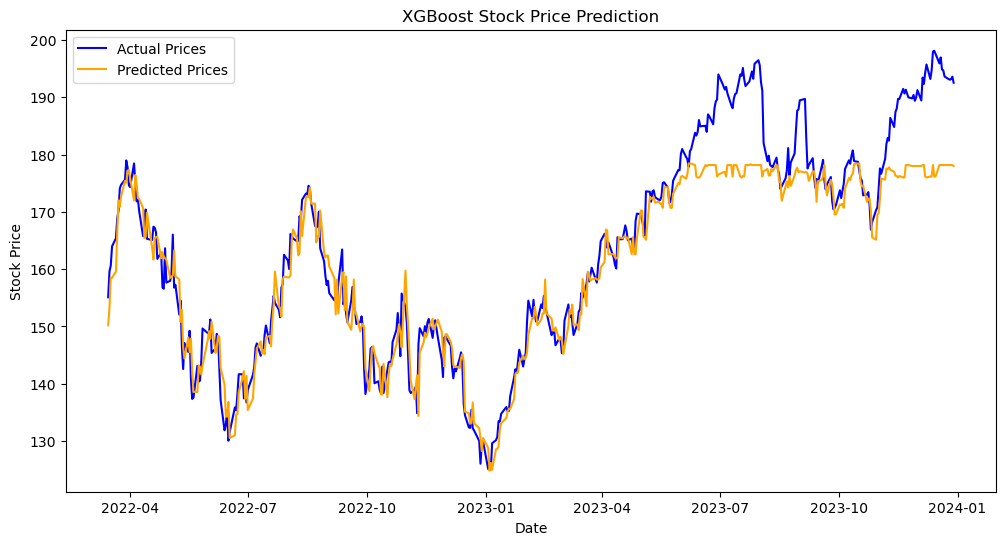

In [93]:
plt.figure(figsize=(12, 6))
plt.plot(y_test.index, y_test, label="Actual Prices", color="blue")
plt.plot(y_test.index, y_pred, label="Predicted Prices", color="orange")
plt.title("XGBoost Stock Price Prediction")
plt.xlabel("Date")
plt.ylabel("Stock Price")
plt.legend()
plt.show()